In [1]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from jutge import *
from jutgeAnalyser import *

from scipy.stats.mstats import kendalltau, spearmanr

import psycopg2
dbname = "test1"
con = psycopg2.connect("dbname=%s" % dbname)

In [2]:
cid = "C00198"

u = select_users(con, course_id=cid)
p = select_pbls(con, course_id=cid, )

m_m, diff_m, abil_m = process(u, p, src="csv/means.csv", verbose=True,
                              vert_name="diff_m", hor_name="abil_m")
m_b, dxiff_b, abil_b = process(u, p, src="csv/bin.csv", verbose=True,
                              vert_name="diff_b", hor_name="abil_b")

Proceed in 2.723 seconds
Using the svd method
Based on the matrix csv/means.csv : 
For 72 users and 220 problems

Proceed in 2.471 seconds
Using the svd method
Based on the matrix csv/bin.csv : 
For 72 users and 220 problems



In [3]:
Abilities = pd.DataFrame([abil_m, abil_b]).T

In [4]:
s1  = Abilities.abil_b.sort_values()

In [5]:
df = pd.DataFrame(s1)
# df = df.reset_index()
s1 = pd.Series(range(len(df.index)), index=df.index)

In [6]:
ordering = pd.DataFrame(index=u)

In [7]:
ordering["abil_b"] = s1

In [8]:
s2  = Abilities.abil_m.sort_values()
df = pd.DataFrame(s2)
# df = df.reset_index()
s2 = pd.Series(range(len(df.index)), index=df.index)
ordering["abil_m"] = s2

In [9]:
mat = pd.read_csv("csv/c00198_irl.csv", index_col=0, sep=";", decimal=".", verbose=False)

In [10]:
s3  = mat.note.sort_values()
df = pd.DataFrame(s3)
print range(len(df.index))
# df = df.reset_index()
s3 = pd.Series(range(len(df.index)), index=df.index)
ordering["IRL"] = s3

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]


<IPython.core.display.Javascript object>


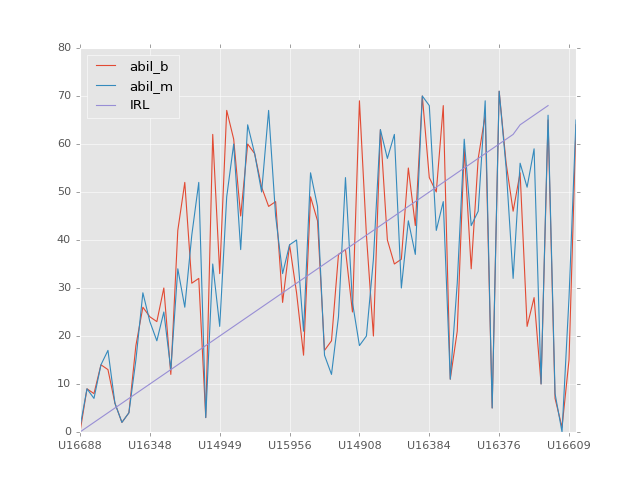

In [11]:
ordering.sort_values(by="IRL").plot()

In [18]:
mat[mat.note >= 5].count()

note    40
dtype: int64